<a href="https://colab.research.google.com/github/khuongduying/data-transformation/blob/main/Data_tidying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting your data into this format requires some work up front, but that work pays off in the long term.

Pivoting allows you to change the form of your data without changing any of the values.

### Prerequisites

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Tidy Data

You can represent the same underlying data in multiple ways

The example below shows the same data organized in three different ways.

Each dataset shows the same values of four variables:
- country
- year
- population
- number of documented cases of TB (tuberculosis)

but each dataset organizes the values in a different way.

In [ ]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


These are all representations of the same underlying data, but they are not equally easy to use.

One of them, table1, will be much easier to work with inside the tidyverse because it’s tidy.

There are three interrelated rules that make a dataset tidy:

1. Each variable is a column; each column is a variable.
2. Each observation is a row; each row is an observation.
3. Each value is a cell; each cell is a single value.

![](https://r4ds.hadley.nz/images/tidy-1.png)

> Why ensure that your data is tidy?


There are two main advantages:

1. There's a general advantage to picking one consistent way of storing data. If you have a consistent data structure, it's easier to learn the tools that work with it because they have an underlying uniformity.
2. There's a specific advantage to placing variables in columns because it allows R's vectorized nature to shine. That makes transforming tidy data feel particularly natural.

Examples:

In [ ]:
# Compute rate per 10,000
table1 |>
  mutate(rate = cases / population * 10000)

# Compute total cases per year
table1 |>
  group_by(year) |>
  summarize(total_cases = sum(cases))

country,year,cases,population,rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


year,total_cases
<dbl>,<dbl>
1999,250740
2000,296920


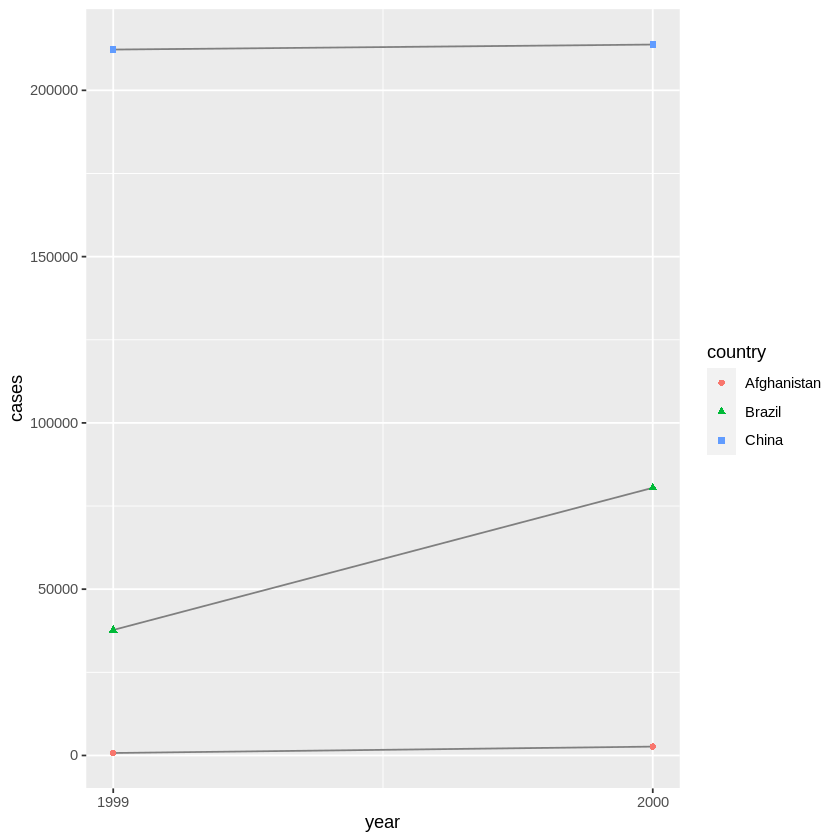

In [ ]:
# Visualize changes over time
ggplot(table1, aes(x = year, y = cases)) +
  geom_line(aes(group = country), color = "grey50") +
  geom_point(aes(color = country, shape = country))+
  scale_x_continuous(breaks = c(1999, 2000)) # x-axis breaks at 1999 and 2000

### Exercises

1. For each of the sample tables, describe what each observation and each column represents.

2. Sketch out the process you'd use to calculate the `rate` for table2 and table3. You will need to perform four operations:

In [ ]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
# a. Extract the number of TB cases per country per year
melt(table2)

ERROR: Error in melt(table2): could not find function "melt"


## Lengthening data

The principles of tidy data might seem so obvious that you wonder if you’ll ever encounter a dataset that isn’t tidy.

Unfortunately, however, most real data is untidy.

There are two main reasons:
1. Data is often organized to facilitate some goal other than analysis. (For example, it's common for data to be structured to make data entry, not analysis, easy.)
2. Most people aren't familiar with the principles of tidy data, and it's hard to derive them yourself unless you spend a lot of time working with data.

> Most real analyses will require at least a little tidying.

> Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data.

Next, you'll pivot your data into a tidy form, with variables in the columns and observations in the rows.

tidyr provides two functions for pivoting data:
- `pivot_longer()`
- `pivot_wider()`

### Data in column names

In [ ]:
billboard |> head()

artist,track,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,⋯,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82,72,77,87,94,99,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2Ge+her,The Hardest Part Of ...,2000-09-02,91,87,92,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Kryptonite,2000-04-08,81,70,68,67,66,57,54,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3 Doors Down,Loser,2000-10-21,76,76,72,69,67,65,55,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
504 Boyz,Wobble Wobble,2000-04-15,57,34,25,17,17,31,36,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
98^0,Give Me Just One Nig...,2000-08-19,51,39,34,26,26,19,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We have 76 columns (wk1-wk76) that describe the rank of the song in each week. Here, the column names are (the week) and the cell values are another (the rank).

To tidy this data, we'll use `pivot_longer()`

In [ ]:
billboard |>
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    values_to = "rank"
  )

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk7,99
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk8,NA
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk9,NA


In [ ]:
billboard |>
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    values_to = "rank"
  ) |> dim()

[1] 24092     5

In [ ]:
billboard |> dim()

[1] 317  79

After the data, there are three key arguments:
- `cols` specifies which columns need to be pivoted, i.e. which columns aren't variables. This argument uses the same syntax as `select()` so here we could use
> `!c(artist, track, date.entered)` or `starts_with("wk")`.

- `names_to` names the variable stored in the column names, we named that variable `week`.
- `values_to` names the variable stored in the cell values, we named that variable `rank`.


What happens if a song is in the top 100 for less than 76 weeks?

> Take 2 Pac’s “Baby Don’t Cry”, for example. The above output suggests that it was only in the top 100 for 7 weeks, and all the remaining weeks are filled in with missing values.

> These NAs don't really represent unknown observations; they were forced to exist by the structure of the dataset, so we can ask `pivot_longer()` to get rid of them by setting `values_drop_na = TRUE`

In [ ]:
billboard |>
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    values_to = "rank",
    values_drop_na = TRUE
  )

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<chr>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk6,94
2 Pac,Baby Don't Cry (Keep...,2000-02-26,wk7,99
2Ge+her,The Hardest Part Of ...,2000-09-02,wk1,91
2Ge+her,The Hardest Part Of ...,2000-09-02,wk2,87


The number of rows is now much lower, indicating that many rows with NAs were dropped.

This data is now tidy, but we could make future computation a bit easier by converting values of `week` from character strings to numbers using `mutate()` and `readr::parse_number()`.

`parse_number()` is a handy function that will extract the first number from a string, ignoring all other text.

In [ ]:
billboard_longer <- billboard |>
  pivot_longer(
    cols = starts_with("wk"),
    names_to = "week",
    values_to = "rank",
    values_drop_na = TRUE
  ) |>
  mutate(
    week = parse_number(week)
  )

billboard_longer |> head()

artist,track,date.entered,week,rank
<chr>,<chr>,<date>,<dbl>,<dbl>
2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,2,82
2 Pac,Baby Don't Cry (Keep...,2000-02-26,3,72
2 Pac,Baby Don't Cry (Keep...,2000-02-26,4,77
2 Pac,Baby Don't Cry (Keep...,2000-02-26,5,87
2 Pac,Baby Don't Cry (Keep...,2000-02-26,6,94


> Now that we have all the week numbers in one variable and all the rank values in another, we’re in a good position to visualize how song ranks vary over time

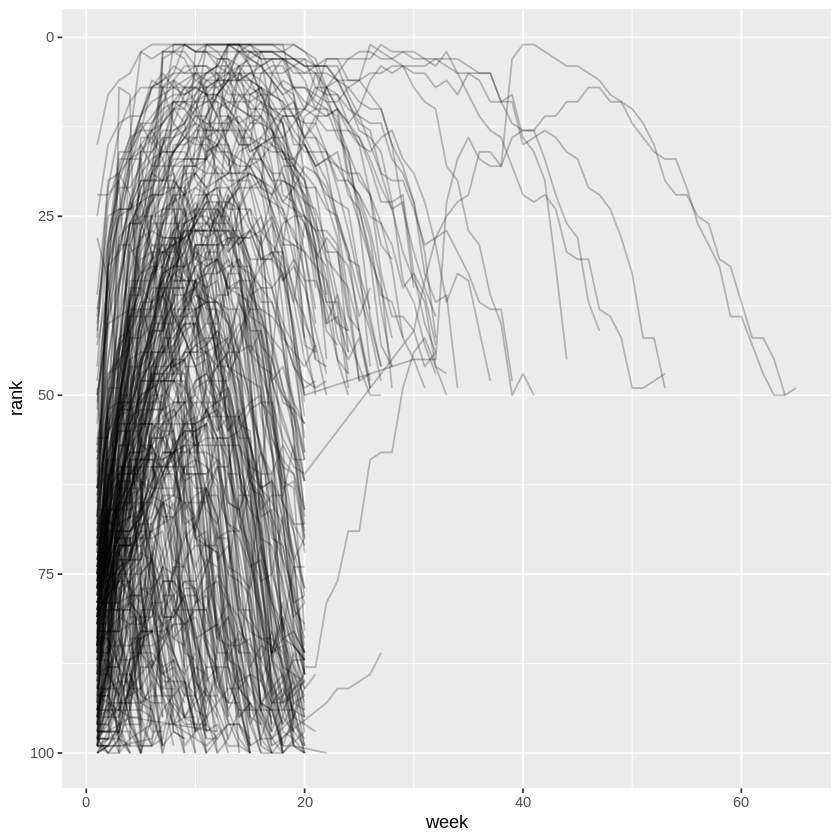

In [ ]:
billboard_longer |>
  ggplot(aes(x = week, y = rank, group = track)) +
  geom_line(alpha = 0.25) +
  scale_y_reverse()

Which song stay longest in the top 100?

In [ ]:
billboard_longer |>
  group_by(track) |>
  summarize(
    n = n() # count the number of week that tracks have been in Billboard top 100
  ) |>
  arrange(desc(n)) |>
  head(10) ## top 10 longest tracks

track,n
<chr>,<int>
Higher,57
Amazed,55
Breathe,53
Kryptonite,53
With Arms Wide Open,47
I Wanna Know,44
Everything You Want,41
Bent,39
He Wasn't Man Enough,37


### How does pivoting work?

 Let’s start with a very simple dataset to make it easier to see what’s happening.

In [ ]:
df <- tribble(
  ~id,  ~bp1, ~bp2,
   "A",  100,  120,
   "B",  140,  115,
   "C",  120,  125
)

In [ ]:
df

id,bp1,bp2
<chr>,<dbl>,<dbl>
A,100,120
B,140,115
C,120,125


In [ ]:
df |>
  pivot_longer(
    cols = bp1:bp2,
    names_to = "measurement",
    values_to = "value"
  )

id,measurement,value
<chr>,<chr>,<dbl>
A,bp1,100
A,bp2,120
B,bp1,140
B,bp2,115
C,bp1,120
C,bp2,125


How does the reshaping work?

![](https://r4ds.hadley.nz/diagrams/tidy-data/variables.png)

![](https://r4ds.hadley.nz/diagrams/tidy-data/column-names.png)

![](https://r4ds.hadley.nz/diagrams/tidy-data/cell-values.png)

### Many variables in column names

A more challenging situation occurs when you have multiple pieces of information crammed into the column names, and you would like to store these in separate new variables.

In [ ]:
who2 |> head()

country,year,sp_m_014,sp_m_1524,sp_m_2534,sp_m_3544,sp_m_4554,sp_m_5564,sp_m_65,sp_f_014,⋯,rel_m_4554,rel_m_5564,rel_m_65,rel_f_014,rel_f_1524,rel_f_2534,rel_f_3544,rel_f_4554,rel_f_5564,rel_f_65
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1980,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1981,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1982,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1983,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1984,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1985,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


This dataset, collected by the World Health Organisation, records information about tuberculosis diagnoses.

There are two columns that are already variables and are easy to interpret: `country` and `year`

They are followed by 56 columns like sp_m_014, ep_m_4554, and rel_m_3544. If you stare at these columns for long enough, you’ll notice there’s a pattern. Each column name is made up of three pieces separated by _.

- The first piece, `sp/rel/ep`, describes the method used for the diagnosis,
- The second piece, `m/f` is the gender (coded as a binary variable in this dataset),
- The third piece, `014/1524/2534/3544/4554/5564/65` is the age range (014 represents 0-14, for example).

In [ ]:
who2_longer <-
who2 |>
  pivot_longer(
    cols = !(country:year),
    names_to = c("diagnosis", "gender", "age"),
    names_sep = "_",
    values_to = "count"
  )

In [ ]:
#table(who2_longer$count)

> An al ternative to `names_sep` is `names_pattern`, which you can use to extract variables from more complicated naming scenarios, once you've learned about regular expressions.

![](https://r4ds.hadley.nz/diagrams/tidy-data/multiple-names.png)

### Data and variable names in the column headers

The next step up in complexity is when the column names include a mix of variable values and variable names. For example, take the `household` dataset:

In [ ]:
household

family,dob_child1,dob_child2,name_child1,name_child2
<int>,<date>,<date>,<chr>,<chr>
1,1998-11-26,2000-01-29,Susan,Jose
2,1996-06-22,NA,Mark,NA
3,2002-07-11,2004-04-05,Sam,Seth
4,2004-10-10,2009-08-27,Craig,Khai
5,2000-12-05,2005-02-28,Parker,Gracie


In [ ]:
household |>
  pivot_longer(
    cols = !family,
    names_to = c(".value", "child"),
    names_sep = "_",
    values_drop_na = TRUE
  )

family,child,dob,name
<int>,<chr>,<date>,<chr>
1,child1,1998-11-26,Susan
1,child2,2000-01-29,Jose
2,child1,1996-06-22,Mark
3,child1,2002-07-11,Sam
3,child2,2004-04-05,Seth
4,child1,2004-10-10,Craig
4,child2,2009-08-27,Khai
5,child1,2000-12-05,Parker
5,child2,2005-02-28,Gracie


## Widening data

`pivot_wider()`, which makes datasets **wider** by increasing columns and reducing rows and helps when one observation is spread across multiple rows.

This seems to arise less commonly in the wild, but it does seem to crop up a lot when dealing with governmental data.

In [2]:
cms_patient_experience

org_pac_id,org_nm,measure_cd,measure_title,prf_rate
<chr>,<chr>,<chr>,<chr>,<dbl>
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information",63
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_2,CAHPS for MIPS SSM: How Well Providers Communicate,87
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_3,CAHPS for MIPS SSM: Patient's Rating of Provider,86
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_5,CAHPS for MIPS SSM: Health Promotion and Education,57
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_8,CAHPS for MIPS SSM: Courteous and Helpful Office Staff,85
0446157747,USC CARE MEDICAL GROUP INC,CAHPS_GRP_12,CAHPS for MIPS SSM: Stewardship of Patient Resources,24
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information",59
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,CAHPS_GRP_2,CAHPS for MIPS SSM: How Well Providers Communicate,85
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,CAHPS_GRP_3,CAHPS for MIPS SSM: Patient's Rating of Provider,83


We can see the complete set of values for `measure_cd` and `measure_title` by using `distinct()`:

In [3]:
cms_patient_experience |>
  distinct(measure_cd, measure_title)

measure_cd,measure_title
<chr>,<chr>
CAHPS_GRP_1,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information"
CAHPS_GRP_2,CAHPS for MIPS SSM: How Well Providers Communicate
CAHPS_GRP_3,CAHPS for MIPS SSM: Patient's Rating of Provider
CAHPS_GRP_5,CAHPS for MIPS SSM: Health Promotion and Education
CAHPS_GRP_8,CAHPS for MIPS SSM: Courteous and Helpful Office Staff
CAHPS_GRP_12,CAHPS for MIPS SSM: Stewardship of Patient Resources


Neither of these columns will make particularly great variable names: `measure_cd` doesn't hint at the meaning of the variable and `measure_title` is a long sentence containing spaces.

We'll use `measure_cd` as the source for out new column names for now

In a real analysis you might want to create your own variable names that are both short and meaningful.

`pivot_wider()` has the opposite interface to `pivot_longer()`:
> instead of choosing new column names, we need to provide the existing columns that define the values (`values_from`) and the column name (`names_from`)

In [4]:
cms_patient_experience |>
  pivot_wider(
    names_from = measure_cd,
    values_from = prf_rate
  )

org_pac_id,org_nm,measure_title,CAHPS_GRP_1,CAHPS_GRP_2,CAHPS_GRP_3,CAHPS_GRP_5,CAHPS_GRP_8,CAHPS_GRP_12
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0446157747,USC CARE MEDICAL GROUP INC,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information",63,NA,NA,NA,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: How Well Providers Communicate,NA,87,NA,NA,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Patient's Rating of Provider,NA,NA,86,NA,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Health Promotion and Education,NA,NA,NA,57,NA,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Courteous and Helpful Office Staff,NA,NA,NA,NA,85,NA
0446157747,USC CARE MEDICAL GROUP INC,CAHPS for MIPS SSM: Stewardship of Patient Resources,NA,NA,NA,NA,NA,24
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,"CAHPS for MIPS SSM: Getting Timely Care, Appointments, and Information",59,NA,NA,NA,NA,NA
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,CAHPS for MIPS SSM: How Well Providers Communicate,NA,85,NA,NA,NA,NA
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,CAHPS for MIPS SSM: Patient's Rating of Provider,NA,NA,83,NA,NA,NA


We still seem to have multiple rows for each organization. That's because, we also need to tell `pivot_wider()` which column or columns have values that uniquely identify each row; in this case those are variables starting with "org":

In [5]:
cms_patient_experience |>
  pivot_wider(
    id_cols = starts_with("org"),
    names_from = measure_cd,
    values_from = prf_rate
  )

org_pac_id,org_nm,CAHPS_GRP_1,CAHPS_GRP_2,CAHPS_GRP_3,CAHPS_GRP_5,CAHPS_GRP_8,CAHPS_GRP_12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0446157747,USC CARE MEDICAL GROUP INC,63,87,86,57,85,24
0446162697,ASSOCIATION OF UNIVERSITY PHYSICIANS,59,85,83,63,88,22
0547164295,BEAVER MEDICAL GROUP PC,49,NA,75,44,73,12
0749333730,CAPE PHYSICIANS ASSOCIATES PA,67,84,85,65,82,24
0840104360,ALLIANCE PHYSICIANS INC,66,87,87,64,87,28
0840109864,REX HOSPITAL INC,73,87,84,67,91,30
0840513552,SCL HEALTH MEDICAL GROUP DENVER LLC,58,83,76,58,78,26
0941545784,GRITMAN MEDICAL CENTER INC,46,86,81,54,NA,25
1052612785,COMMUNITY MEDICAL GROUP LLC,65,84,80,58,87,29


### How does `pivot_wider()` work?

In [6]:
df <- tribble(
  ~id, ~measurement, ~value,
  "A",        "bp1",    100,
  "B",        "bp1",    140,
  "B",        "bp2",    115,
  "A",        "bp2",    120,
  "A",        "bp3",    105
)

In [7]:
df

id,measurement,value
<chr>,<chr>,<dbl>
A,bp1,100
B,bp1,140
B,bp2,115
A,bp2,120
A,bp3,105


In [8]:
df |>
  pivot_wider(
    names_from = measurement,
    values_from = value
  )

id,bp1,bp2,bp3
<chr>,<dbl>,<dbl>,<dbl>
A,100,120,105
B,140,115,NA


To begin the process `pivot_wider()` needs to first figure out what will go in the rows and columns. The new column names will be the unique values of measurement.

In [9]:
df |>
  distinct(measurement) |>
  pull()

[1] "bp1" "bp2" "bp3"

By default, the rows in the output are determined by all the variables that aren't going into the new names or values. These are called the `id_cols`.

In [11]:
df |>
  select(-measurement, -value) |>
  distinct()

id
<chr>
A
B


`pivot_wider()` then combines these results to generate an empty data frame

In [12]:
df |>
  select(-measurement, -value) |>
  distinct() |>
  mutate (x = NA, y = NA, z = NA)

id,x,y,z
<chr>,<lgl>,<lgl>,<lgl>
A,NA,NA,NA
B,NA,NA,NA


In [13]:
df <- tribble(
  ~id, ~measurement, ~value,
  "A",        "bp1",    100,
  "A",        "bp1",    102,
  "A",        "bp2",    120,
  "B",        "bp1",    140,
  "B",        "bp2",    115
)

In [14]:
df |>
  pivot_wider(
    names_from = measurement,
    values_from = value
  )

Warning message:
“Values from `value` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} |>
  dplyr::summarise(n = dplyr::n(), .by = c(id, measurement)) |>
  dplyr::filter(n > 1L)”


id bp1 <NA> bp2 <NA>
1 A  100 140  120 115 
2 B  102 140  120 115

In [15]:
df |>
  group_by(id, measurement) |>
  summarize(n = n(), .groups = "drop") |>
  filter(n > 1)

id,measurement,n
<chr>,<chr>,<int>
A,bp1,2
